# 1. Import Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("monthly_milk_production.csv")

In [4]:
df

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [5]:
df = pd.read_csv("monthly_milk_production.csv", index_col="Date", parse_dates=True)

In [6]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
df.loc["1962-01":"1962-04"]

In [8]:
df.loc["1962"]

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
1962-06-01,697
1962-07-01,640
1962-08-01,599
1962-09-01,568


In [9]:
df.loc["1962"].mean()

Production    615.75
dtype: float64

<Axes: xlabel='Date'>

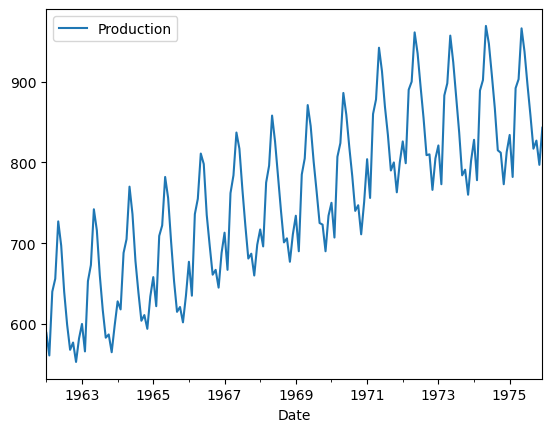

In [10]:
df.plot()

<Axes: xlabel='Date'>

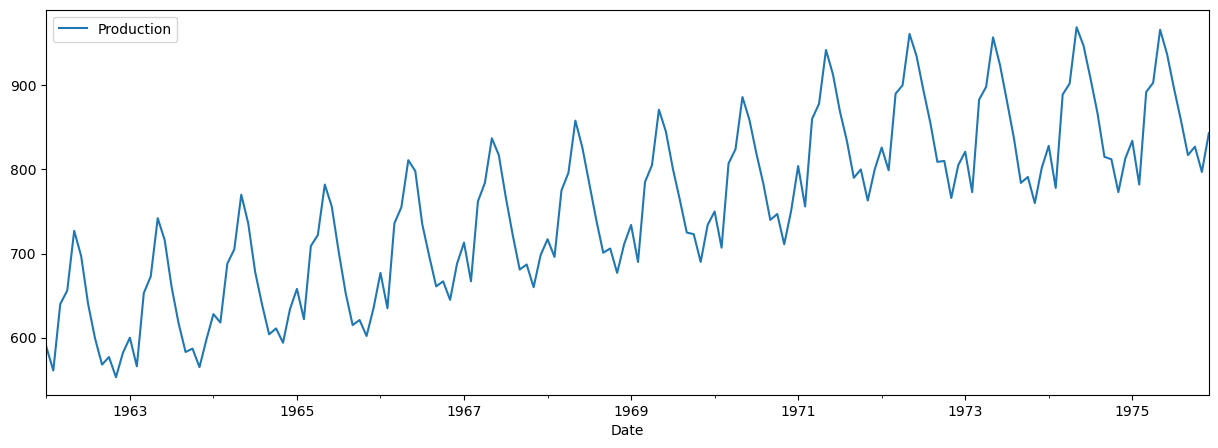

In [11]:
df.plot(figsize=(15,5))

In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df.index.freq = "MS"

In [15]:
result = seasonal_decompose(df["Production"])

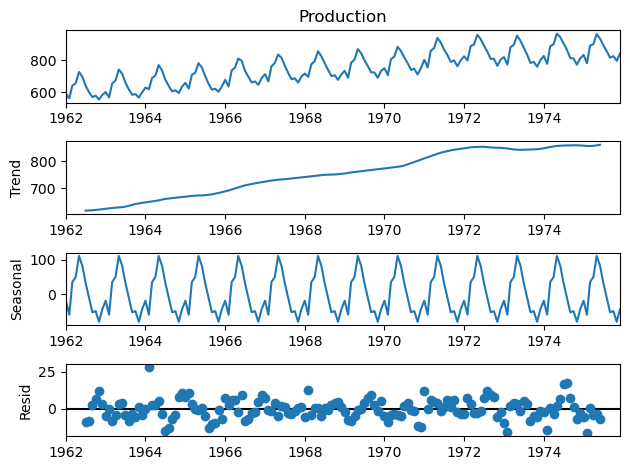

In [16]:
result.plot();

In [17]:
len(df)

168

In [18]:
train = df.iloc[:156]
test = df.iloc[156:]

In [19]:
len(train)

156

In [20]:
len(test)

12

In [21]:
train.iloc[0], train.iloc[-1]

(Production    589
 Name: 1962-01-01 00:00:00, dtype: int64,
 Production    813
 Name: 1974-12-01 00:00:00, dtype: int64)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(train)

MinMaxScaler()

In [25]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [26]:
scaled_train[:5]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923]])

In [27]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [28]:
n_input = 3

In [29]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [30]:
len(generator)

153

In [31]:
X, y = generator[0]
X.ravel(), y

(array([0.08653846, 0.01923077, 0.20913462]), array([[0.24759615]]))

In [32]:
X, y = generator[1]
X.ravel(), y

(array([0.01923077, 0.20913462, 0.24759615]), array([[0.41826923]]))

In [33]:
scaled_train[:12]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154]])

In [34]:
X, y = generator[8]
X.ravel(), y

(array([0.03605769, 0.05769231, 0.        ]), array([[0.06971154]]))

In [35]:
X, y = generator[11]
X.ravel(), y

(array([0.06971154, 0.11298077, 0.03125   ]), array([[0.24038462]]))

In [36]:
X.shape

(1, 3, 1)

In [37]:
df.head(3), df.tail(3)

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640,
             Production
 Date                  
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [38]:
n_input = 12

In [39]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [40]:
X, y = generator[0]
X.ravel(), y

(array([0.08653846, 0.01923077, 0.20913462, 0.24759615, 0.41826923,
        0.34615385, 0.20913462, 0.11057692, 0.03605769, 0.05769231,
        0.        , 0.06971154]),
 array([[0.11298077]]))

In [41]:
X.shape

(1, 12, 1)

In [42]:
from tensorflow.keras.models import Sequential

In [43]:
from tensorflow.keras.layers import Dense, LSTM

In [44]:
model = Sequential()

In [45]:
model.add(LSTM(1000, activation="relu", input_shape=(12, 1)))
model.add(Dense(1))

In [46]:
model.compile(optimizer="adam", loss="mse")

In [47]:
model.fit(generator, epochs=40)

Epoch 1/40
144/144 [==============================] - 51s 346ms/step - loss: 0.0339
Epoch 2/40
144/144 [==============================] - 49s 340ms/step - loss: 0.0122
Epoch 3/40
144/144 [==============================] - 49s 339ms/step - loss: 0.0134
Epoch 4/40
144/144 [==============================] - 51s 355ms/step - loss: 0.0093
Epoch 5/40
144/144 [==============================] - 49s 337ms/step - loss: 0.0039
Epoch 6/40
144/144 [==============================] - 49s 339ms/step - loss: 0.0033
Epoch 7/40
144/144 [==============================] - 49s 340ms/step - loss: 0.0042
Epoch 8/40
144/144 [==============================] - 50s 346ms/step - loss: 0.0037
Epoch 9/40
144/144 [==============================] - 51s 351ms/step - loss: 0.0024
Epoch 10/40
144/144 [==============================] - 52s 359ms/step - loss: 0.0029
Epoch 11/40
144/144 [==============================] - 51s 356ms/step - loss: 0.0027
Epoch 12/40
144/144 [==============================] - 50s 350ms/step - lo

In [48]:
loss = model.history.history["loss"]

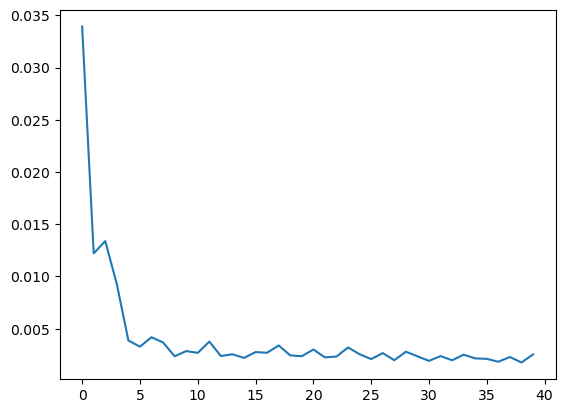

In [49]:
plt.plot(loss)

In [58]:
last_train_batch = scaled_train[-12:]

In [59]:
last_train_batch = last_train_batch.reshape(1, 12, 1)

In [60]:
last_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [61]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 48ms/step


array([[0.68179786]], dtype=float32)

In [62]:
scaled_test[0]

array([0.67548077])

In [64]:
test_pred = []

first_eval_batch = scaled_train[-12:]
current_batch = first_eval_batch.reshape((1, 12, 1))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_pred.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 45ms/step


In [65]:
test_pred

[array([0.68179786], dtype=float32),
 array([0.598727], dtype=float32),
 array([0.79936385], dtype=float32),
 array([0.8445127], dtype=float32),
 array([0.9748434], dtype=float32),
 array([0.9423574], dtype=float32),
 array([0.85784996], dtype=float32),
 array([0.7750999], dtype=float32),
 array([0.6705735], dtype=float32),
 array([0.653226], dtype=float32),
 array([0.5811393], dtype=float32),
 array([0.64957404], dtype=float32)]

In [66]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [67]:
true_pred = scaler.inverse_transform(test_pred)

In [83]:
test["Predicated Production"] = true_pred

In [84]:
test.head()

,Production,Predicated Production
Date,,
1975-01-01,834,836.627911
1975-02-01,782,802.070427
1975-03-01,892,885.535362
1975-04-01,903,904.317284
1975-05-01,966,958.534847


<Axes: xlabel='Date'>

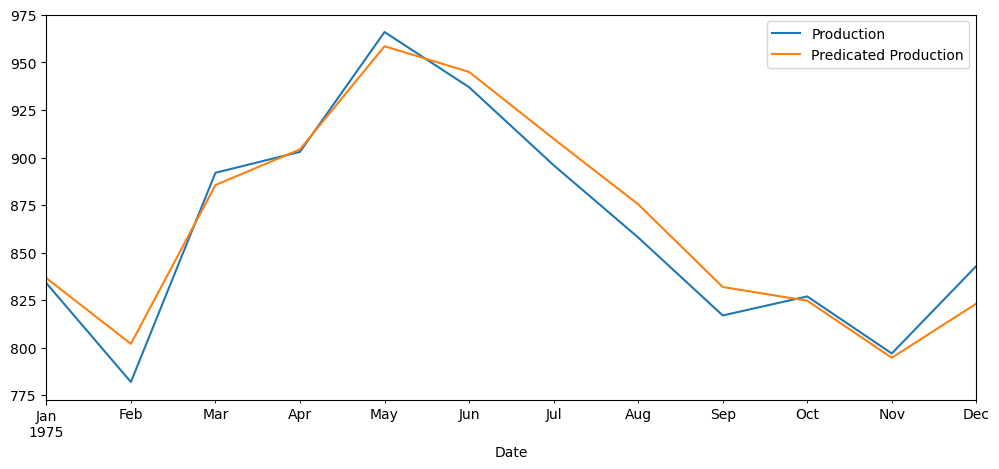

In [85]:
test.plot(figsize=(12,5))

In [86]:
from sklearn.metrics import mean_squared_error  ---# Regression model

In [89]:
rsme = np.sqrt(mean_squared_error(test["Production"], test["Predicated Production"]))

In [90]:
rsme

11.884219191149057

In [ ]:
## 14.555867

In [91]:
pip install prophet

                                              0.0/13.3 MB ? eta -:--:--
                                             0.0/13.3 MB 653.6 kB/s eta 0:00:21
                                             0.0/13.3 MB 653.6 kB/s eta 0:00:21
                                             0.1/13.3 MB 469.7 kB/s eta 0:00:29
                                             0.1/13.3 MB 595.3 kB/s eta 0:00:23
                                             0.1/13.3 MB 595.3 kB/s eta 0:00:23
                                             0.2/13.3 MB 655.4 kB/s eta 0:00:21
                                             0.3/13.3 MB 787.7 kB/s eta 0:00:17
     -                                       0.4/13.3 MB 955.7 kB/s eta 0:00:14
     -                                        0.5/13.3 MB 1.2 MB/s eta 0:00:11
     --                                       0.7/13.3 MB 1.5 MB/s eta 0:00:09
     --                                       0.8/13.3 MB 1.6 MB/s eta 0:00:09
     --                                       1.0/1